# Question 2 - Online Food Dataset

Importing libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
!pip install kneed

Loading the dataset

In [63]:
data=pd.read_csv("/content/drive/MyDrive/ML/onlinefoods.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


Pre- Processing

In [64]:

data=data.drop('Unnamed: 12',axis=1)
data.head(2)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [67]:
#separating X and y
X=data.iloc[:,:-1].values
y=data.iloc[:,11].values
X[0:5],y[0:5]

(array([[20, 'Female', 'Single', 'Student', 'No Income', 'Post Graduate',
         4, 12.9766, 77.5993, 560001, 'Yes'],
        [24, 'Female', 'Single', 'Student', 'Below Rs.10000', 'Graduate',
         3, 12.977, 77.5773, 560009, 'Yes'],
        [22, 'Male', 'Single', 'Student', 'Below Rs.10000',
         'Post Graduate', 3, 12.9551, 77.6593, 560017, 'Yes'],
        [22, 'Female', 'Single', 'Student', 'No Income', 'Graduate', 6,
         12.9473, 77.5616, 560019, 'Yes'],
        [22, 'Male', 'Single', 'Student', 'Below Rs.10000',
         'Post Graduate', 4, 12.985, 77.5533, 560010, 'Yes']], dtype=object),
 array(['Positive', 'Positive', 'Negative ', 'Positive', 'Positive'],
       dtype=object))

In [68]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
labelEncoder_y = LabelEncoder()
X[:, 1]= labelEncoder_X.fit_transform(X[:, 1])
X[:, 2]= labelEncoder_X.fit_transform(X[:, 2])
X[:, 3]= labelEncoder_X.fit_transform(X[:, 3])
X[:, 4]= labelEncoder_X.fit_transform(X[:, 4])
X[:, 5]= labelEncoder_X.fit_transform(X[:, 5])
X[:, 10]= labelEncoder_X.fit_transform(X[:, 10])
y= labelEncoder_y.fit_transform(y)
X[0:3],y[0:5]


(array([[20, 0, 2, 3, 4, 2, 4, 12.9766, 77.5993, 560001, 1],
        [24, 0, 2, 3, 2, 0, 3, 12.977, 77.5773, 560009, 1],
        [22, 1, 2, 3, 2, 2, 3, 12.9551, 77.6593, 560017, 1]], dtype=object),
 array([1, 1, 0, 1, 1]))

In [69]:
#performing one hot encoding
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("Gender",OneHotEncoder(),[1,2,3,4,5,10])],remainder="passthrough")
X = ct.fit_transform(X)
X[0:5]

array([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 20, 4, 12.9766, 77.5993,
        560001],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 24, 3, 12.977, 77.5773,
        560009],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 22, 3, 12.9551, 77.6593,
        560017],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 22, 6, 12.9473, 77.5616,
        560019],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 22, 4, 12.985, 77.5533,
        560010]], dtype=object)

In [70]:
from sklearn.model_selection import train_test_split
#CHECK FOR TRAIN TEST SPLIT RATIO
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


EDA - Exploratory Data Analysis

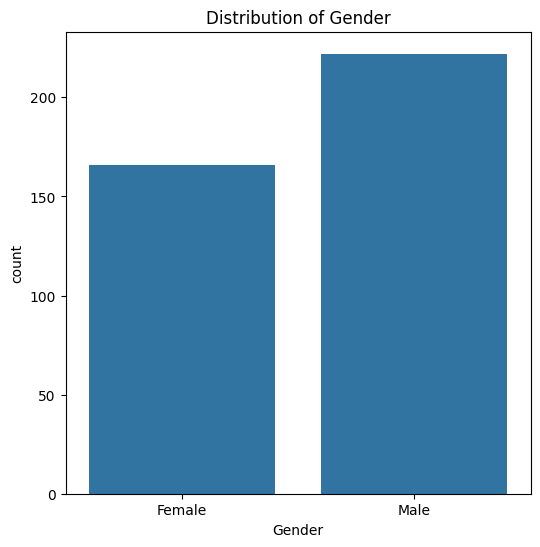

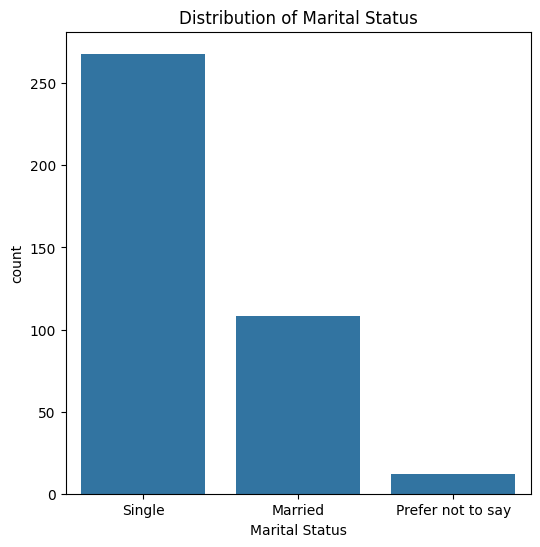

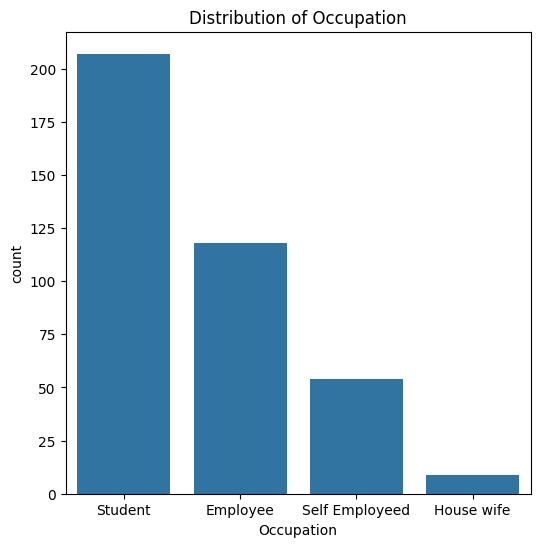

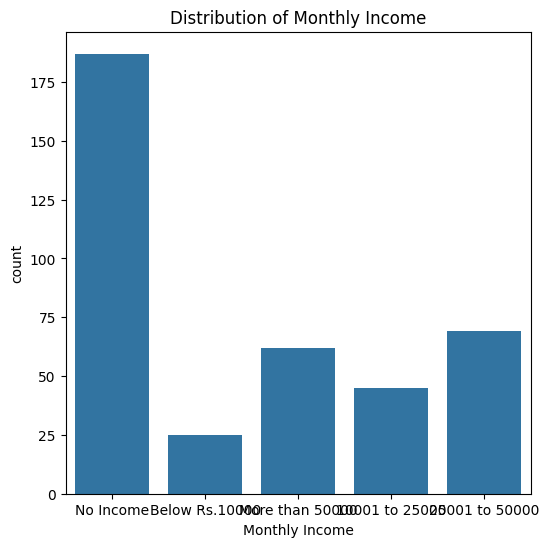

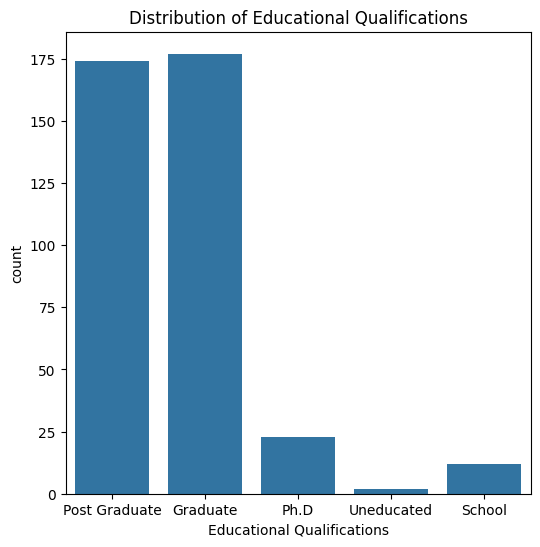

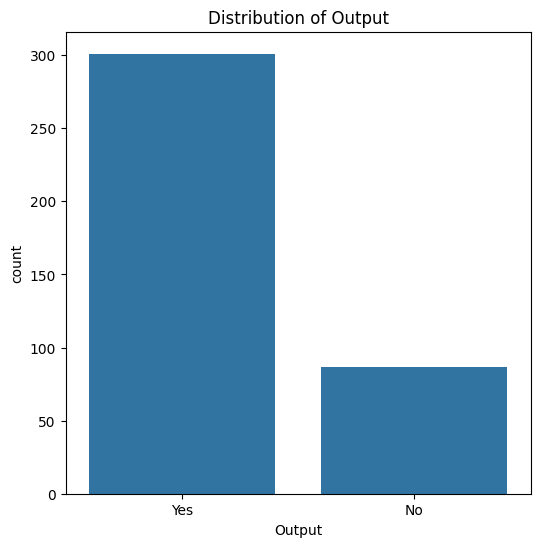

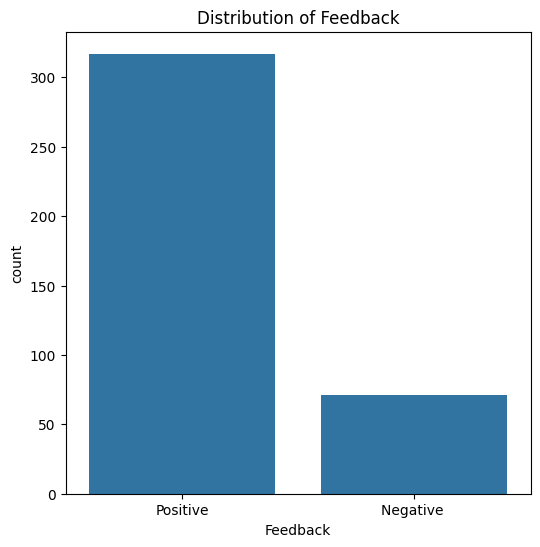

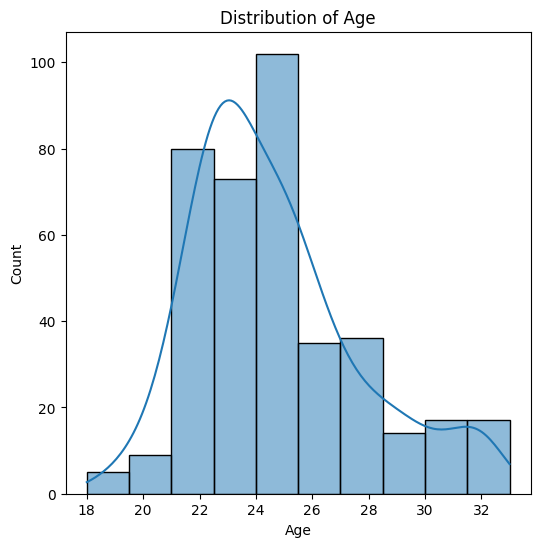

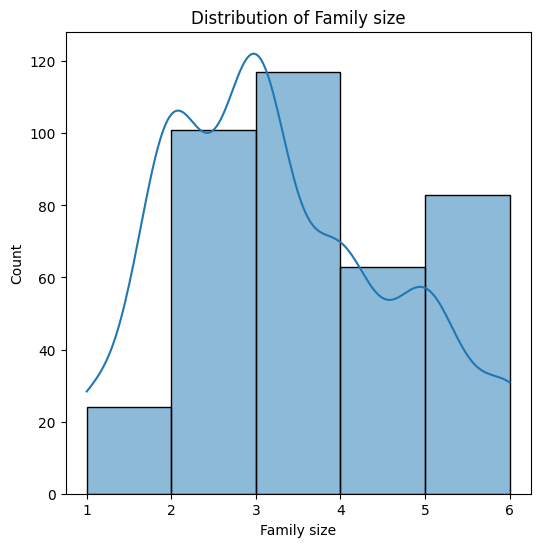

In [102]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Marital Status', data=data)
plt.title('Distribution of Marital Status')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Occupation', data=data)
plt.title('Distribution of Occupation')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Monthly Income', data=data)
plt.title('Distribution of Monthly Income')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Educational Qualifications', data=data)
plt.title('Distribution of Educational Qualifications')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Output', data=data)
plt.title('Distribution of Output')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Feedback', data=data)
plt.title('Distribution of Feedback')
plt.show()

# Distribution of numerical variables
plt.figure(figsize=(6, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(data['Family size'], bins=5, kde=True)
plt.title('Distribution of Family size')
plt.show()


Feature Engineering

In [71]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
print(X_train[0:2])
X_test = sc_X.transform(X_test)
print(X_test[0:2])

[[ 1.1612428  -1.1612428   1.61389317 -0.15199444 -1.52752523  1.55131989
  -0.15199444 -0.39587425 -1.10194633 -0.35675303  2.20205736 -0.26956328
  -0.43852901 -0.9745181   1.08066284 -0.26956328 -0.88408664 -0.16275769
  -0.0805823   1.86889101 -1.86889101  1.1377725   1.31092677  0.0730299
  -0.80845468 -0.50872961]
 [ 1.1612428  -1.1612428  -0.6196197  -0.15199444  0.65465367 -0.64461238
  -0.15199444 -0.39587425  0.90748521 -0.35675303 -0.45412078 -0.26956328
  -0.43852901  1.0261482  -0.925358   -0.26956328  1.13111085 -0.16275769
  -0.0805823  -0.53507668  0.53507668 -0.86625861 -1.69934952 -1.95695858
   0.10155587  1.2040629 ]]
[[-0.86114635  0.86114635 -0.6196197  -0.15199444  0.65465367 -0.64461238
  -0.15199444 -0.39587425  0.90748521 -0.35675303 -0.45412078 -0.26956328
  -0.43852901  1.0261482  -0.925358   -0.26956328  1.13111085 -0.16275769
  -0.0805823  -0.53507668  0.53507668 -0.86625861 -0.19421137 -0.93083502
  -1.11583603  1.49491446]
 [-0.86114635  0.86114635  1.61

KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

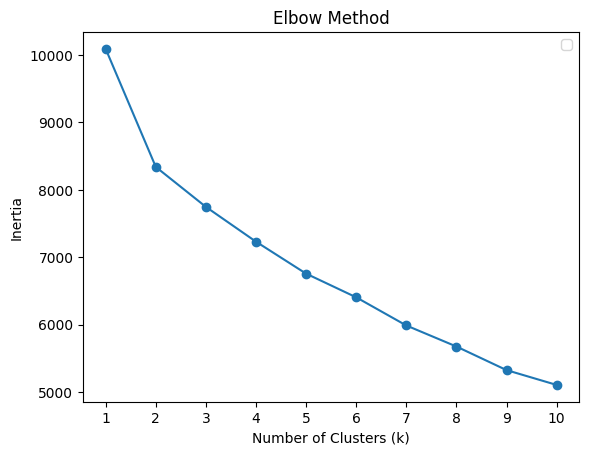

In [133]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Assuming your dataset is in a CSV file named 'dataset.csv', adjust accordingly if it's in a different format
#file_path = 'dataset.csv'

# Read the dataset into a pandas DataFrame
#df = pd.read_csv(file_path)

# Assuming you want to use all columns for clustering. If not, select the relevant columns.


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of k values to try
k_values = range(1, 11) # Adjust the range as needed

# Perform K-means clustering for each value of k and compute the inertia (sum of squared distances to the nearest cluster center)
inertia = []
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Use the KneeLocator function to find the optimal number of clusters
knee = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
optimal_k = knee.elbow



plt.xticks(k_values)
plt.legend()
plt.show()



In [134]:
#applying knn model with euclidean metric
classifier= KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)
y_pred_euc = classifier.predict(X_test)
y_test[0:10],y_pred_euc[0:10]


(array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1]), array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1]))

In [135]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_euc)
print(cm)

[[11  3]
 [ 8 56]]


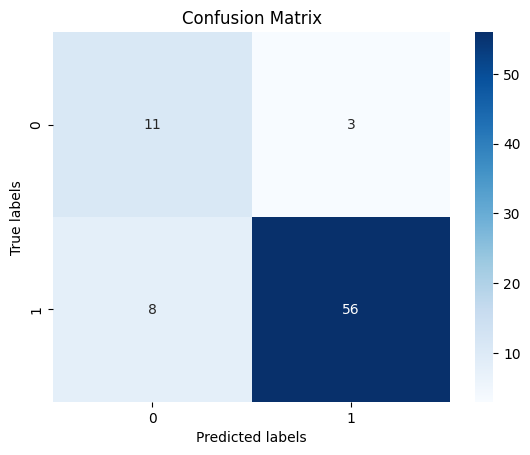

precision: 0.5789473684210527
recall: 0.7857142857142857
accuracy: 0.8589743589743589
f_measure: 0.6666666666666667
f_measure: 0.6666666666666667


In [136]:
cm = confusion_matrix(y_test, y_pred_euc)
#confusion matrix
#Plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#compute precision,recall,accuracy,f-measure by using confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
f_measure=2*precision*recall/(precision+recall)
print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f_measure:",f_measure)
print("f_measure:",f_measure)

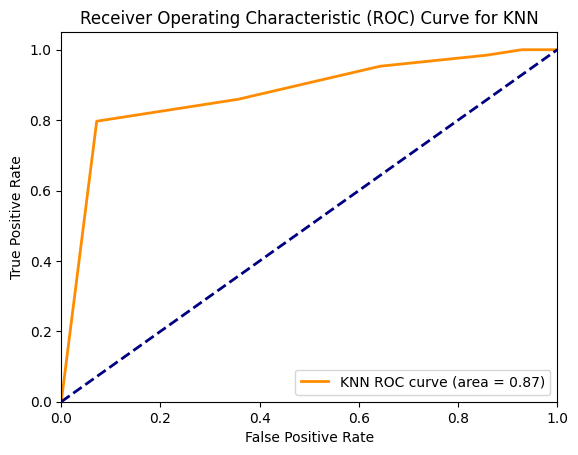

In [137]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Compute probabilities of the positive class
y_prob_knn = knn.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


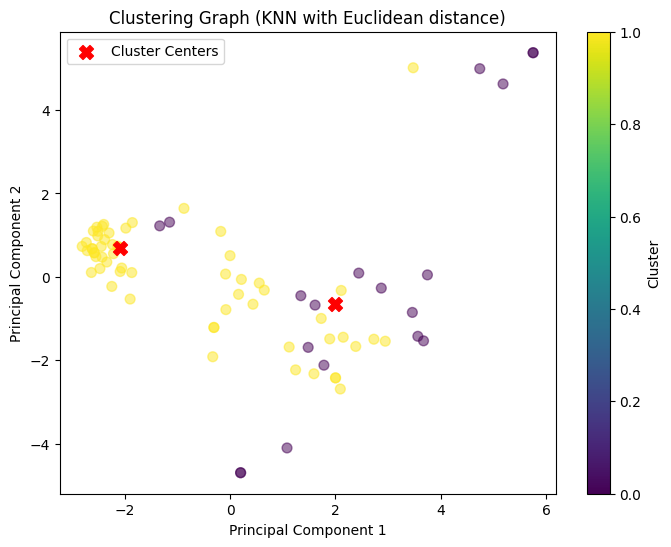

In [141]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering with the number of clusters based on unique labels in y_pred_euc
n_clusters = len(np.unique(y_pred_euc))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the clusters and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_euc, cmap='viridis', s=50, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
plt.title('Clustering Graph (KNN with Euclidean distance)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


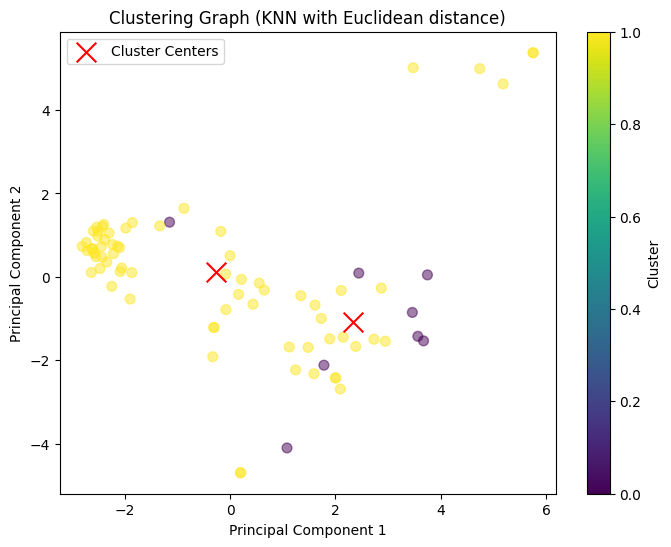

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_euc, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Graph (KNN with Euclidean distance)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Compute cluster centers
cluster_centers = []
for label in set(y_pred_euc):
    cluster_centers.append(X_pca[y_pred_euc == label].mean(axis=0))

# Plot cluster centers
cluster_centers = np.array(cluster_centers)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, color='red', label='Cluster Centers')

plt.colorbar(label='Cluster')
plt.legend()
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


SVM - Support Vector Machine

In [76]:
#applying svm linear
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_test[0:10],y_pred[0:10]

(array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1]), array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1]))

In [77]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  3]
 [ 9 55]]


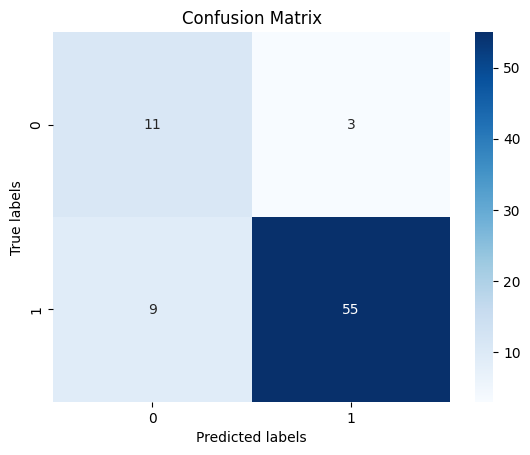

preision: 0.55
recall: 0.7857142857142857
accuracy: 0.8461538461538461
f_measure: 0.6470588235294117


In [78]:
#confusion matrix
#Plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#compute precision,recall,accuracy,f-measure by using confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
f_measure=2*precision*recall/(precision+recall)
print("preision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f_measure:",f_measure)

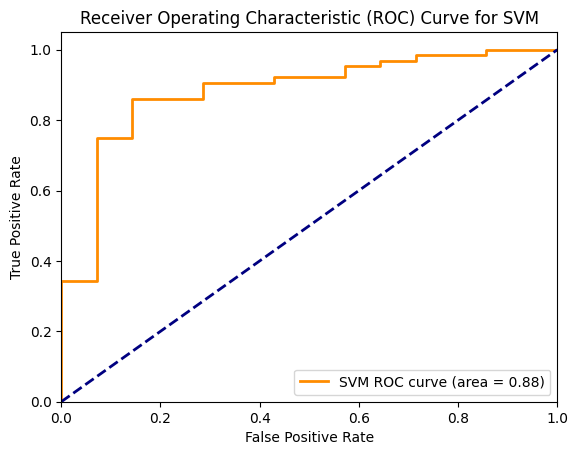

In [79]:
from sklearn.svm import SVC

# Create SVM classifier
svm = SVC(probability=True)

# Train the model
svm.fit(X_train, y_train)

# Compute probabilities of the positive class
y_prob_svm = svm.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()


LR- Logistic Regression

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [81]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 9  5]
 [ 7 57]]


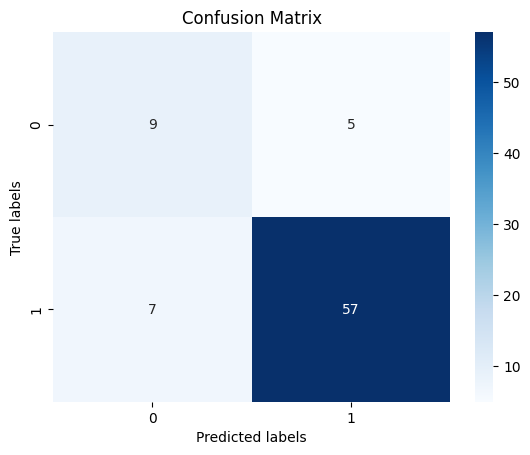

precision: 0.5625
recall: 0.6428571428571429
accuracy: 0.8461538461538461
f_measure: 0.6000000000000001


In [82]:
#confusion matrix
#Plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#compute precision,recall,accuracy,f-measure by using confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
f_measure=2*precision*recall/(precision+recall)
print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f_measure:",f_measure)

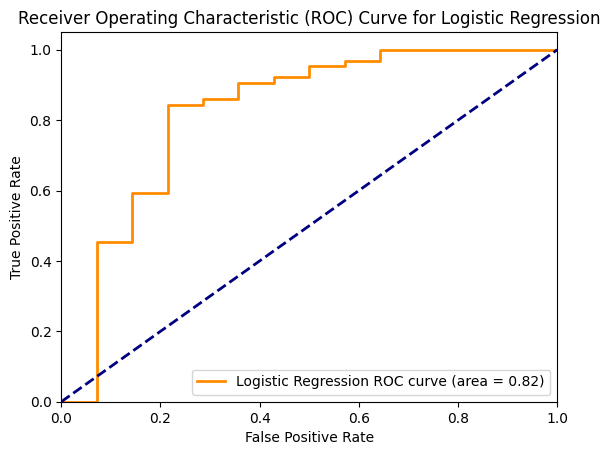

In [83]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression classifier
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Compute probabilities of the positive class
y_prob_log_reg = log_reg.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Plot ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


NB- Naive Bayes


In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [85]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  1]
 [44 20]]


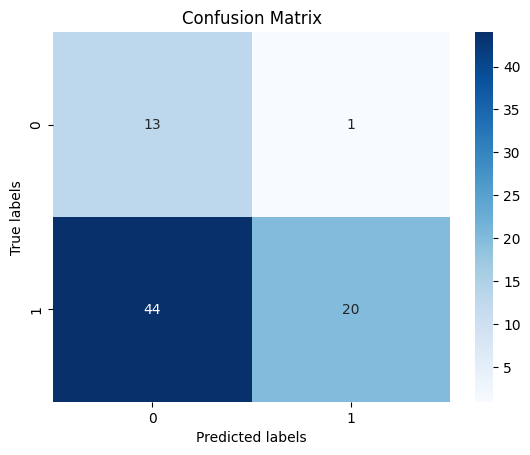

precision: 0.22807017543859648
recall: 0.9285714285714286
accuracy: 0.4230769230769231
f_measure: 0.3661971830985915


In [86]:
#confusion matrix
#Plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#compute precision,recall,accuracy,f-measure by using confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
f_measure=2*precision*recall/(precision+recall)
print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f_measure:",f_measure)

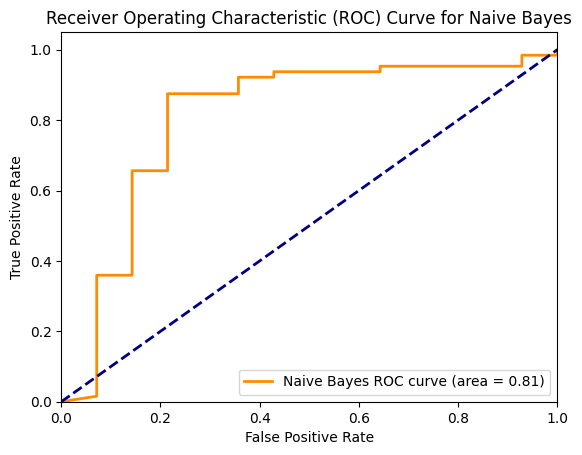

In [87]:
from sklearn.naive_bayes import GaussianNB

# Create Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Compute probabilities of the positive class
y_prob_nb = nb.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for Naive Bayes
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


MLP

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create MLP classifier
model = MLPClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  6]
 [ 3 61]]


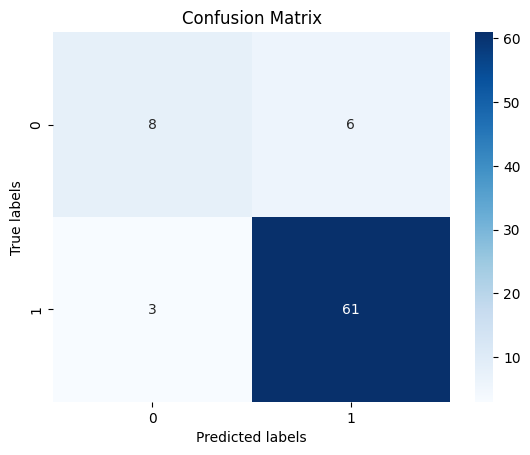

precision: 0.7272727272727273
recall: 0.5714285714285714
accuracy: 0.8846153846153846
f_measure: 0.64


In [90]:
#confusion matrix
#Plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#compute precision,recall,accuracy,f-measure by using confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
f_measure=2*precision*recall/(precision+recall)
print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f_measure:",f_measure)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


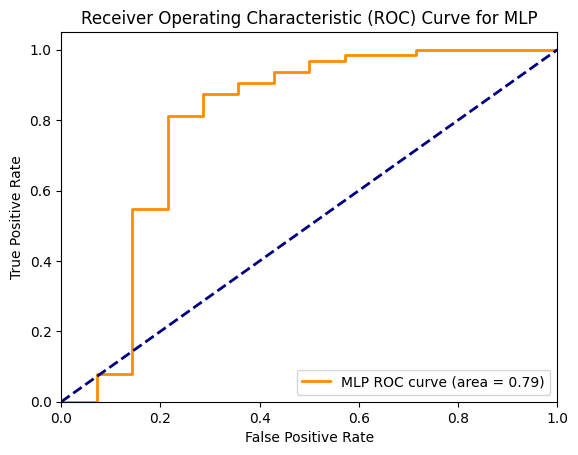

In [91]:
from sklearn.neural_network import MLPClassifier

# Create MLP classifier
mlp = MLPClassifier()

# Train the model
mlp.fit(X_train, y_train)

# Compute probabilities of the positive class
y_prob_mlp = mlp.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curve for MLP
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='MLP ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc="lower right")
plt.show()


PLA

In [95]:
from sklearn.linear_model import Perceptron

# Create Perceptron classifier
pla = Perceptron()

# Train the model
pla.fit(X_train, y_train)

# Make predictions
y_pred = pla.predict(X_test)


In [96]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 4 10]
 [ 5 59]]


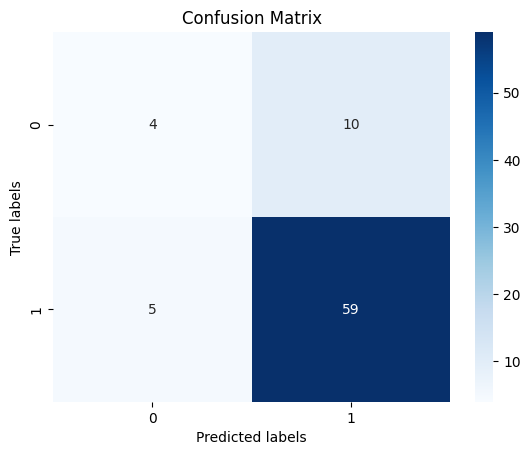

precision: 0.4444444444444444
recall: 0.2857142857142857
accuracy: 0.8076923076923077
f_measure: 0.34782608695652173


In [97]:
#confusion matrix
#Plot confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#compute precision,recall,accuracy,f-measure by using confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
f_measure=2*precision*recall/(precision+recall)
print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f_measure:",f_measure)

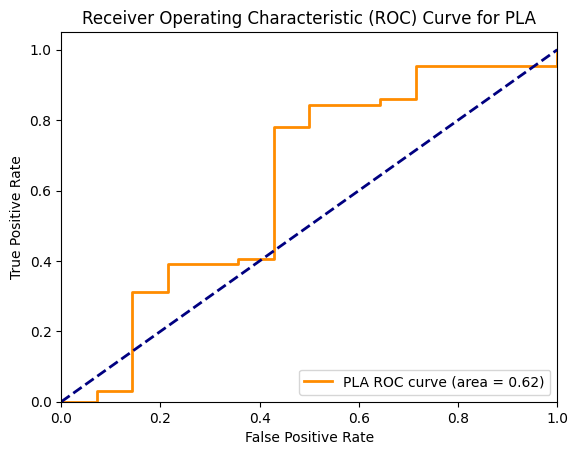

In [114]:
from sklearn.linear_model import Perceptron

# Create Perceptron classifier
pla = Perceptron()

# Train the model
pla.fit(X_train, y_train)

# Obtain decision scores
y_prob_pla = pla.decision_function(X_test)

# Compute ROC curve and ROC area for PLA
fpr_pla, tpr_pla, _ = roc_curve(y_test, y_prob_pla)
roc_auc_pla = auc(fpr_pla, tpr_pla)

# Plot ROC curve for PLA
plt.figure()
plt.plot(fpr_pla, tpr_pla, color='darkorange', lw=2, label='PLA ROC curve (area = %0.2f)' % roc_auc_pla)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for PLA')
plt.legend(loc="lower right")
plt.show()


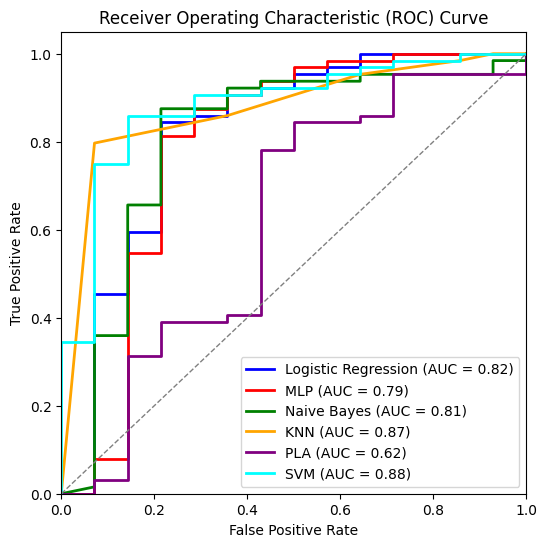

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each classifier
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_pla, tpr_pla, _ = roc_curve(y_test, y_prob_pla)
roc_auc_pla = auc(fpr_pla, tpr_pla)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(6, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label='MLP (AUC = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_pla, tpr_pla, color='purple', lw=2, label='PLA (AUC = %0.2f)' % roc_auc_pla)
plt.plot(fpr_svm, tpr_svm, color='cyan', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Inferences




*   The model with the highest AUC (Area Under the ROC Curve) score performs better. In this case, both KNN and SVM have the highest AUC scores of 0.87 and 0.88, respectively. Therefore, we consider KNN and SVM as the better-performing models.

*   KNN achieves moderate precision and recall but a high accuracy compared to other models. However, its F-measure indicates a moderate balance between precision and recall.
*   SVM demonstrates relatively high recall but lower precision compared to KNN. Its F-measure indicates a reasonable balance between precision and recall.

*   Logistic Regression shows similar precision and recall to SVM, with a balanced F-measure indicating good overall performance.
*   Naive Bayes achieves high recall but low precision, resulting in a low F-measure and accuracy. It seems to have a high false positive rate.

*   MLP performs well across all metrics, showing high precision, recall, accuracy, and a balanced F-measure.
*   PLA exhibits lower precision, recall, and accuracy compared to other models, indicating suboptimal performance.

# Observations

*   Naive Bayes has a relatively high recall (0.929) but a low precision (0.228) and accuracy (0.423). The high recall suggests that the model may be capturing the majority of positive instances but at the expense of many false positives. This imbalance between recall and precision could indicate overfitting, especially if the model is overly sensitive to the training data.


*   Other models (KNN, SVM, Logistic Regression, PLA) demonstrate relatively consistent performance across precision, recall, and accuracy, with no extreme imbalances between the metrics.

## Conclusion



*   KNN and SVM outperform other models, showcasing superior classification accuracy and reliability in predictive tasks.

*   Their robustness and efficiency make them ideal choices for handling the dataset's complexities and nuances effectively.

*   With KNN and SVM, the dataset's classification tasks are executed with precision and optimal performance, ensuring reliable outcomes.


   